In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [9]:
np.random.seed(42)
x=np.random.rand(10)
y=np.sin(2*np.pi*x)+np.random.normal(0,0.3,10)#y=信号+噪音
w=np.linspace(0,1,100)

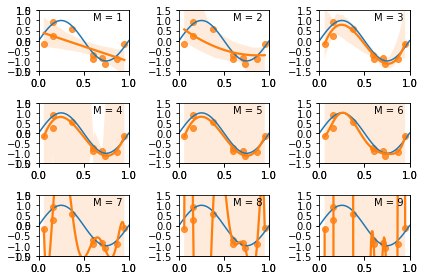

In [10]:
fig,ax=plt.subplots(3,3,sharey=True)#sharey=True避免纵坐标重叠
fig.subplots_adjust(hspace=1,wspace=1)
for m in range(1,10):
    ax=fig.add_subplot(3,3,m)
    ax.set_xlim([0,1])
    ax.set_ylim([-1.5,1.5])
    ax.set_yticks(np.arange(-1.5,2,0.5))
    ax.plot(w,np.sin(2*np.pi*w))
    sns.regplot(x,y,order=m)
    ax.text(0.6,1,'M = '+str(m))
plt.tight_layout()

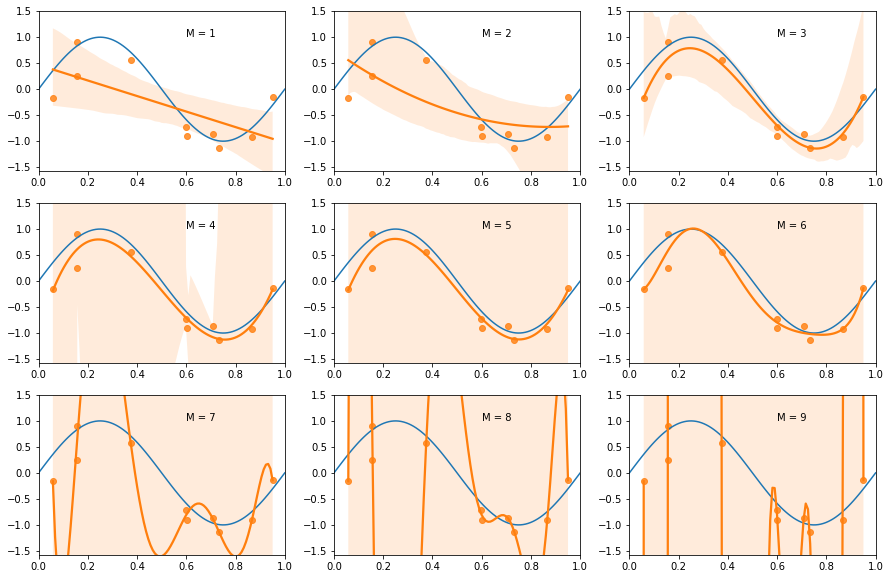

In [11]:
plt.figure(figsize=(15,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.xlim(0,1)
    plt.ylim(-1.5,-1.5)
    plt.yticks(np.arange(-1.5,2,0.5))
    plt.plot(w,np.sin(2*np.pi*w))
    sns.regplot(x,y,order=i)
    plt.text(0.6,1,'M = '+str(i))


In [12]:
R2=[]
train_error=[]
for i in range(1,9):#np.polyfit不便计算n个观测值估计n个参数
    stats=np.polyfit(x,y,i,full=True)
    ssr=stats[1]
    train_error.append((ssr/10)**0.5)
    r2=1-ssr/np.sum((y-y.mean())**2)
    R2.append(r2)
R2.append(1)#手动添加i=10的情形
train_error.append(0)

Text(0.5, 1.0, 'In-sample Fit')

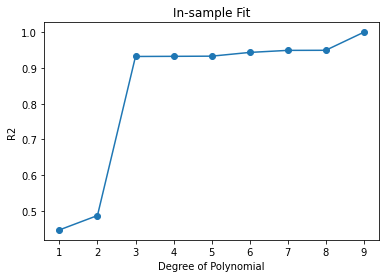

In [13]:
m=np.arange(1,10)
plt.plot(m,R2,'o-')#'o-'表示既画原点又画直线
plt.xlabel('Degree of Polynomial')
plt.ylabel('R2')
plt.title('In-sample Fit')

[0.9544364968465753,
 0.9603820057765311,
 0.9067065872008669,
 0.9070004827206133,
 0.9057537014168874,
 0.9098737556968214,
 1.0658585578299213,
 1.2961465164394812,
 2.0188981585175845]

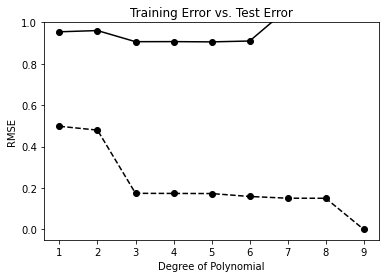

In [14]:
test_error=[]
for i in range(1,10):
    np.random.seed(123)
    x_new=np.random.rand(100)
    y_new=np.sin(2*np.pi*x_new)+np.random.normal(0,0.3,100)
    beta=np.polyfit(x,y,i)
    pred=np.polyval(beta,x_new)#predicting data = ……,val=evaluate,beta从高次到低次
    ssr=np.sum((y_new-pred)**2)
    test_error.append((ssr/100)**0.05)
plt.plot(range(1,10),train_error,'o--k',label='Training Error')
plt.plot(range(1,10),test_error,'o-k',label='Test Error')
plt.ylim(-0.05,1)
plt.ylabel('RMSE')
plt.xlabel('Degree of Polynomial')
plt.title('Training Error vs. Test Error')
test_error